
# Tutorial rápido de Python para Matemáticos

&copy; Ricardo Miranda Martins, 2022 - http://www.ime.unicamp.br/~rmiranda/

## Índice

1. [Introdução](1-intro.html) 
2. [Python é uma boa calculadora!](2-calculadora.html) [(código fonte)](2-calculadora.ipynb)
3. [Resolvendo equações](3-resolvendo-eqs.html)  [(código fonte)](3-resolvendo-eqs.ipynb)
4. [Gráficos](4-graficos.html)  [(código fonte)](4-graficos.ipynb)
5. [Sistemas lineares e matrizes](5-lineares-e-matrizes.html)  [(código fonte)](5-lineares-e-matrizes.ipynb)
6. [Limites, derivadas e integrais](6-limites-derivadas-integrais.html)  [(código fonte)](6-limites-derivadas-integrais.ipynb)
7. [Equações direrenciais](7-equacoes-diferenciais.html)  [(código fonte)](7-equacoes-diferenciais.ipynb)



# Gráficos

Fazer gráficos no Python é sinônimo para ```matplotlib```. Esse pacote é fantástico e muito poderoso. Produz gráficos bem legais se for bem utilizada. O [site do Matplotlib](https://matplotlib.org/) tem muitos exemplos legais, e aqui vamos abordar somente o básico.

Usaremos também o NumPy, que é o "primo" do SymPy, só que para cálculos numéricos. Para um tutorial do NumPy, [veja no site](https://numpy.org/doc/stable/index.html) deles a documentação.

Os gráficos mais simples feitos no computador são simples amontoados de pontos, bem colocados. Sabe quando a gente tenta fazer o gráfico de $y=x^2$, marca 2 pontos, risca com a régua, e ganha 0 na questão? Então, se você tivesse marcado 5000 pontos bem colocados, seu professor poderia até ter considerado alguma coisa - e é exatamente aí que o NumPy entra em jogo, para construir essas "malhas" de pontos.

Vamos começar com o gráfico de $f(x)=x^2+1$, com $x\in[-3,3]$.


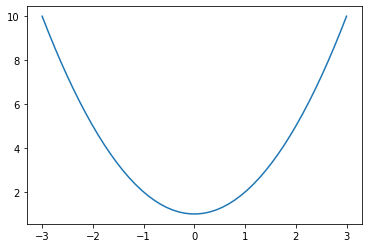

In [32]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# definindo a funcao
def f(x):
    return x**2+1 

# definindo o intervalo de x e quantos pontos serão criados.
# abaixo definimos que o gráfico será criado com base em 50 pontos
# com coordenada x igualmente distribuída entre -3 e 3.
# a variável x armazenará uma lista com esses 50 pontos.
# esse processo é conhecido por "discretização".
x = np.linspace(-3, 3, 50)

# definicao de y=f(x). na verdade, o que esse comando faz é criar uma
# lista aplicando a funcao f(x) que definimos acima nos pontos da lista
# que contém os valores de x (os tais 50 valores entre -3 e 3)
y = f(x)

# plotando a funcao y=f(x).
plt.plot(x, y)

Só por curiosidade, o que acontece se ao invés de 50 pontos, escolhermos menos pontos?

Abaixo plotamos o mesmo gráfico acima, só que com base em somente 4 pontos:

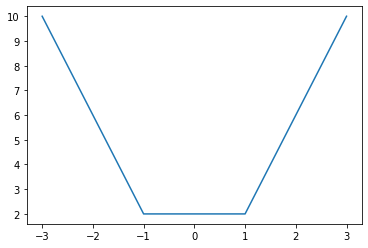

In [33]:
x = np.linspace(-3, 3, 4)
y=f(x)
plt.plot(x, y)

Viu? É por isso que com poucos pontos a gente ganha zero na questão! :)

Uma boa estratégia ao usar o ```matplotlib``` é construir o gráfico aos poucos, para poder adicionar legendas nos eixos e outros detalhes. Isso pode ser feito como no exemplo abaixo.

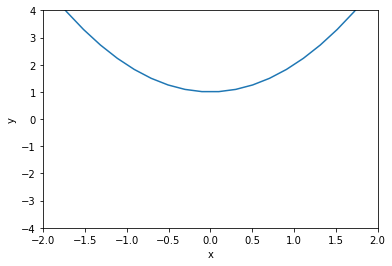

In [34]:
# vamos chamar de "a" um primeiro plot vazio, só com os eixos.
a = plt.axes()

# agora damos nomes para os eixos do gráfico vazio.
a.set_xlabel('x');
a.set_ylabel('y');

# delimitando a área da janela de visualização para ser com
# x entre -2 e 2 e y entre -4 e 4
a.set(xlim=(-2,2), ylim=(-4,4))


# e finalmente adicionamos o gráfico.
# note que agora vamos até aumentar o valor de x, mas isso
# não tem impacto na janela de visualização, que já definimos
# anteriormente. colocamos 100 pontos para o gráfico ficar suave.
x = np.linspace(-10, 10, 100)
y=f(x)

# agora o plot tem que ser dado com o prefixo a, para usar as configurações
# anteriores.
a.plot(x, y)

Podemos também usar o Python para plotar curvas parametrizadas. O comando é parecido:

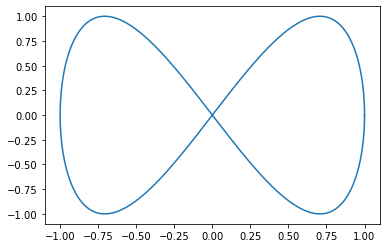

In [35]:
t = np.linspace(0, 2*np.pi, 200)
x = np.cos(t)
y = np.sin(2*t)
plt.plot(x, y)

Note que o comando é praticamente o mesmo nos dois casos acima: plotando muitos pontos de uma curva parametrizada (no primeiro caso, a curva é da forma $(t,f(t))$).

Um terceiro tipo de gráfico bidimensional é quando queremos plotar curvas de nível de uma função. Para isso, temos um outro comando, o ```contour```. Veja muitas outras opções sobre plots de curvas de nível [aqui nesse site](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html).

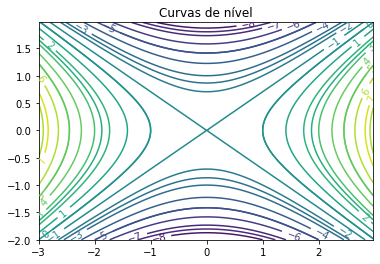

In [36]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# o comando abaixo é muito parecido com o linspace que usamos antes.
# a diferença é que aqui, ao invés de definirmos o número de pontos
# que iremos usar para plotar, vamos definir ponto inicial, ponto
# final e o incremento, neste caso delta=0.025. 
# é só uma outra forma de fazer a discretização.
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)


# aqui o primeiro truque: transformamos os dois "intervalos" de x e y
# numa malha bidimensional, fazendo uma espécie de produto cartesiano
# dos pontos, e renomeamos a primeira coordenada desses pontos como x
# e a segunda como y. esse é só um artifício técnico.
x, y = np.meshgrid(x, y)

# aqui definimos a funcao/equacao da qual vamos plotar as curvas de nivel.
# note que ela usa as variáveis com letras maiúsculas, pois o que vamos
# armazenar no vetor Z é o valor dessa funcao em cada um dos pontos da
# malha criada.
z = x**2-2*y**2-1

fig, ax = plt.subplots()

# a sintaxe do contor é intervalo X, intervalo Y, funcao e quantidade
# de contornos. abaixo, plotamos 20 curvas de nível.
contornos = ax.contour(x, y, z, 20)

ax.clabel(contornos, inline=True, fontsize=10)
ax.set_title('Curvas de nível')

plt.contour(x, y, z)


O matplotlib também faz gráficos tridimensionais. A ideia do plot continua a mesma: o gráfico vai ser obtido pela união de vários pontos.

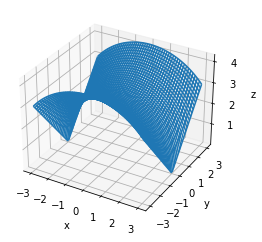

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# definindo a função
def f(x, y):
    return np.sqrt(9-x**2+y**2) 

# discretizando x e y
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

# artifício do produto cartesiano
x, y = np.meshgrid(x, y)

# define z como z=f(x,y)
z = f(x, y)

# indica que iremos fazer um gráfico 3d e nomeia os eixos
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# finalmente, adiciona a função (no caso, estamos plotando
# em versão wireframe, ou seja, você vai ver a malha sobre a
# superfície.

ax.plot_wireframe(x, y, z)

Podemos ainda plotar superfícies parametrizadas. O processo é parecido com o de antes: discretizamos o domínio e daí calculamos a função na malha criada. Vamos fazer isso para plotar um toro, usando sua parametrização usual. O código abaixo foi inspirado [nesse site](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/7/ch07lvl1sec76/plotting-a-parametric-3d-surface).

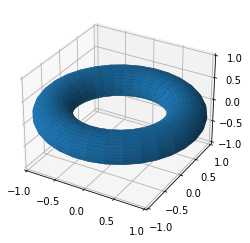

In [38]:
# discretizando as duas variáveis de ângulo
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)

# pegando valores comuns para os raios interno e exteno
r, R = 0.3, 1

# parametrização
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# criando o ambiente 3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# limitando os eixos
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

# exibindo a figura
ax.plot_surface(x, y, z, rstride=1, cstride=1)
plt.show()

Por fim, podemos ainda fazer plots de curvas parametrizadas em 3D:

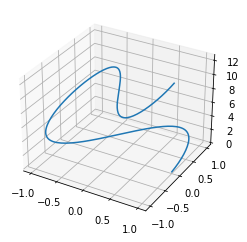

In [39]:
# criando o ambiente 3d
ax = plt.axes(projection='3d')

# discretizando t
t = np.linspace(0, 2*np.pi, 200)

# definindo as coordenadas da parametrizacao
x = np.cos(t)
y = np.sin(2*t)
z = 2*t

# plotando
ax.plot(x, y, z)